In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
x = iris.iloc[:,:4]
y = iris.iloc[:,-1] 

In [7]:
stdsc = StandardScaler()
stdsc.fit(x)
std_array = stdsc.transform(x)
X = pd.DataFrame(std_array,columns = x.columns)

In [13]:
cluster = GaussianMixture(n_components=4)
cluster.fit(X)
y_pred = cluster.predict(X)
score = adjusted_rand_score(y,y_pred)
score

0.8521048636655573

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_array = pca.fit_transform(iris.drop(['Species','Id'],axis=1))
pca_df = pd.DataFrame(pca_array,columns=["PC1","PC2"])
pca_df.head()

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [17]:
col_code = {0:"red",1:"green",2:"blue",3:"yellow"}
label = {0:"setosa",1:"versicolor",2:"virginica",3:"orange"}

pca_df["labels"]= pd.DataFrame(y_pred)
groups = pca_df.groupby('labels')

# Grouping instances based on species
groups.mean()

,PC1,PC2
labels,,
0,1.600258,-0.211252
1,-2.640841,0.190520
2,0.514712,-0.240414
3,2.696257,0.355189


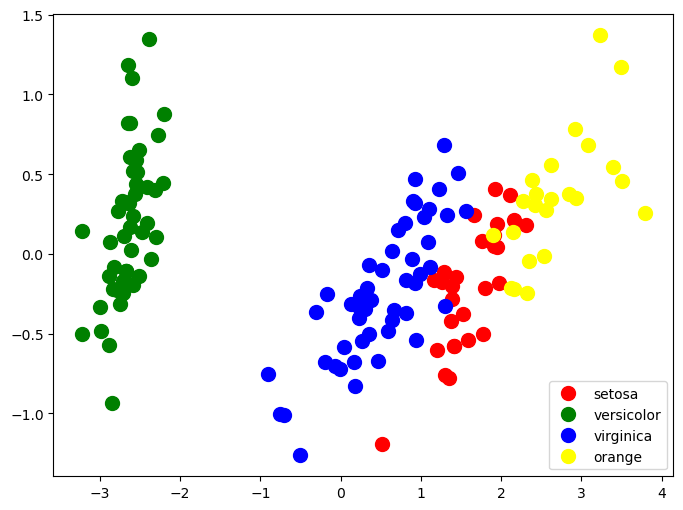

In [18]:
fig, ax = plt.subplots(1,1,figsize =(8,6))
for name, group in groups:
    ax.plot(group.PC1,group.PC2,color = col_code[name],label = label[name],marker='o',linestyle='',ms=10)
ax.legend()
plt.show()